In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from hashlib import md5

In [2]:
properties_qm9 = ['G', 'H', 'L']
subsets = [-1, 0, 1, 2]
train_sizes_qm9 = {-1: 64000, 0:32000, 1:32000, 2:16000}
sigmas_qm9 = {-1: 256.0, 0: 256.0, 1: 256.0, 2: 256.0}
res_qm9 = {}
for p in properties_qm9:
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm9[sub]
        n_train = train_sizes_qm9[sub]
        text = f'qm9 loop {p} {sub} slatm laplacian {sig} -12 {n_train}'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_lc_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_qm9[p] = res_p

In [3]:
res_qm9['G'][0].keys()

dict_keys(['mae_av', 'std_err', 'prop', 'sub', 'R', 'ktype', 'sig', 'lam_exp', 'hash', 'train_sizes'])

In [4]:
res_qm9['L'][-1][2]['mae_av']

[0.20347259340141396,
 0.17232158720498325,
 0.15112140118992146,
 0.13318881552933948,
 0.11659990934828166,
 0.10054411057984132,
 0.08650918345464328]

In [5]:
res_qm9['G'][0]['train_sizes']

[1000, 2000, 4000, 8000, 16000, 32000]

In [6]:
res_qm9['G'][-1].keys()

dict_keys([0, 1, 2, 'prop', 'sub', 'R', 'ktype', 'sig', 'lam_exp', 'hash', 'train_sizes'])

In [7]:
res_qm9['G'][-1][0].keys()

dict_keys(['mae_av', 'std_err'])

In [34]:
def plot_references(ax, ref):
    
    for key, value in ref.items():
        ax.plot(value['n_train'], value['mae'], label=key, color='black', ls=value['ls'], marker=value['marker'], ms=4., mew=1., lw=1.)
        
    return ax


def subplot_axes_lc(ax, train_sizes, mae, train_sizes_subsets, mae_subsets, labels, labels_subsets, colors, markers, subsets,
                    xticks, yticks, add_ref, ref):
    
    for i, sub in enumerate(subsets):
        ax.plot(train_sizes, mae[sub], label=labels[sub], color=colors[i], marker=markers[i], 
                ls='-', ms=2., mew=1., fillstyle=None, lw=1.)
        ax.plot(train_sizes_subsets[sub], mae_subsets[sub], label=labels_subsets[sub], 
                color=colors[i], marker=markers[i], ls=':', ms=2, mew=1., fillstyle=None, lw=1.)
        
    if add_ref:
        ax = plot_references(ax, ref)
        
    ax.set_xscale('log')
    ax.set_yscale('log')
        
    ax.grid()
    ax.minorticks_off()
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)    
    
    x_low = xticks[0] - (xticks[1] - xticks[0]) / 4
    x_high = xticks[-1] + (xticks[-1] - xticks[-2]) / 2
    
    ax.set_xlim(x_low, x_high)
    
    y_low = yticks[0] - (yticks[1] - yticks[0]) / 2
    y_high = yticks[-1] + (yticks[-1] - yticks[-2]) / 2
    
    ax.set_ylim(y_low, y_high)
    
    for side, spine in ax.spines.items():
        spine.set_linewidth(1.)
        
    return ax


def single_plot_lc(res_p, labels, labels_subsets, colors, markers, subsets, xticks, xticklabels, yticks, yticklabels, 
                   add_ref=False, ref=None, save=False, filename='figure.png'):
    
    fs = 6.
    
    fig = plt.figure(figsize=(1, 1.5), dpi=300)
    ax = fig.add_subplot(111)
    
    train_sizes = res_p[-1]['train_sizes']
    
    mae = {}
    train_sizes_subsets = {}
    mae_subsets = {}
    for sub in subsets:
        mae[sub] = res_p[-1][sub]['mae_av']
        mae_subsets[sub] = res_p[sub]['mae_av']
        train_sizes_subsets[sub] = res_p[sub]['train_sizes']
    
    ax = subplot_axes_lc(ax, train_sizes, mae, train_sizes_subsets, mae_subsets, labels, labels_subsets, 
                         colors, markers, subsets, xticks, yticks, add_ref, ref)
    
    ax.legend(fontsize=fs, ncol=1, frameon=False, 
              bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
    ax.set_xlabel(r'$N_{\mathrm{tr}}$', fontsize=fs)
    ax.set_ylabel(r'MAE [eV]', fontsize=fs)
    
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    
    ax.tick_params(axis='both', width=1., direction='in', size=2.5, labelsize=fs, pad=2.)
        
    if save:
        plt.savefig(filename)
        
    return 

In [26]:
# labels = ['Class I / 0', 'Class II / 0', 'Class III / 0']
# labels_subsets = ['Class I', 'Class II', 'Class III']

labels = ['arom./C=O', 'single unsat.', 'saturated']
labels_subsets = ['arom./C=O (c)', 'single unsat. (c)', 'saturated (c)']

colors = ['orange', 'forestgreen', 'firebrick']
markers = ['o', '^', 'v']

In [10]:
def get_min_max_mae(res_p, subsets):
    
    mae_array = []
    for sub in subsets:
        mae_array.append(res_p[-1][sub]['mae_av'])
        
    mae_min = np.amin(np.asarray(mae_array))
    mae_max = np.amax(np.asarray(mae_array))
    
    for sub in subsets:
        mae_min = min(mae_min, np.amin(res_p[sub]['mae_av']))
        mae_max = max(mae_max, np.amax(res_p[sub]['mae_av']))
        
    return (mae_min, mae_max)

In [11]:
get_min_max_mae(res_qm9['G'], [0, 1, 2])

(0.08581166060742748, 0.35802017062180025)

In [12]:
xticks_qm9 = {}
xticklabels_qm9 = {}
yticks_qm9 = {}
yticklabels_qm9 = {}

In [13]:
xticks_qm9['G'] = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
xticklabels_qm9['G'] = ['1', '', '4', '', '16', '', '64']
yticks_qm9['G'] = [0.1, 0.2, 0.3, 0.4]
yticklabels_qm9['G'] = yticks_qm9['G']

In [36]:
ref_qm9 = {}
ref_qm9['G'] = {'Faber 2017 (NN)': {'n_train': [100, 100000], 'mae': [0.0869, 0.0869], 'ls': '--', 'marker': ''}, 
                'Schuett 2018': {'n_train': [100, 100000], 'mae': [0.063, 0.063], 'ls': '-.', 'marker': ''}, 
                'Collins 2018': {'n_train': 16000, 'mae': 0.19, 'ls': '', 'marker': 'h'}, 
                'Anderson 2019': {'n_train': 50000, 'mae': 0.061, 'ls': '', 'marker': 'p'}}

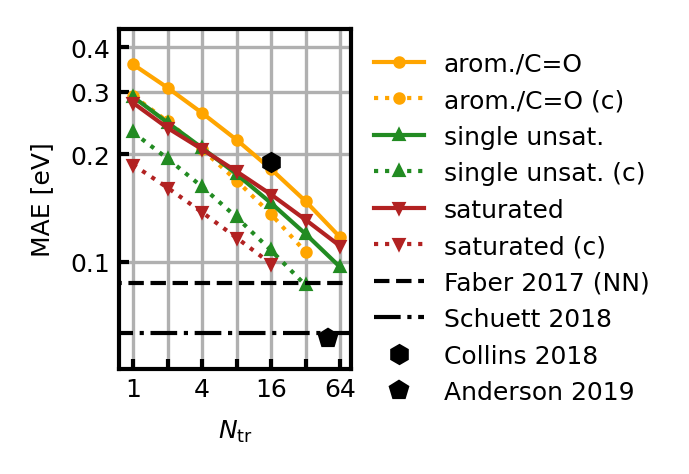

In [37]:
single_plot_lc(res_qm9['G'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm9['G'], xticklabels_qm9['G'], 
               yticks_qm9['G'], yticklabels_qm9['G'], True, ref_qm9['G'])

In [28]:
get_min_max_mae(res_qm9['H'], [0, 1, 2])

(0.0610458621012824, 0.22464586002044157)

In [39]:
xticks_qm9['H'] = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
xticklabels_qm9['H'] = ['1', '', '4', '', '16', '', '64']
yticks_qm9['H'] = [0.05, 0.1, 0.15, 0.2]
yticklabels_qm9['H'] = yticks_qm9['H']

In [47]:
ref_qm9['H'] = {'Faber 2017': {'n_train': [100, 100000], 'mae': [0.0549, 0.0549], 'ls': '--', 'marker': ''}, 
                'Schuett 2018': {'n_train': [100, 100000], 'mae': [0.041, 0.041], 'ls': '-.', 'marker': ''},
                'Collins 2018': {'n_train': 16000, 'mae': 0.12, 'ls': '', 'marker': 'h'},  
                'Anderson 2019': {'n_train': 50000, 'mae': 0.034, 'ls': '', 'marker': 'p'}, 
                'Stuke 2018': {'n_train': 32000, 'mae': 0.086, 'ls': '', 'marker': '+'},}

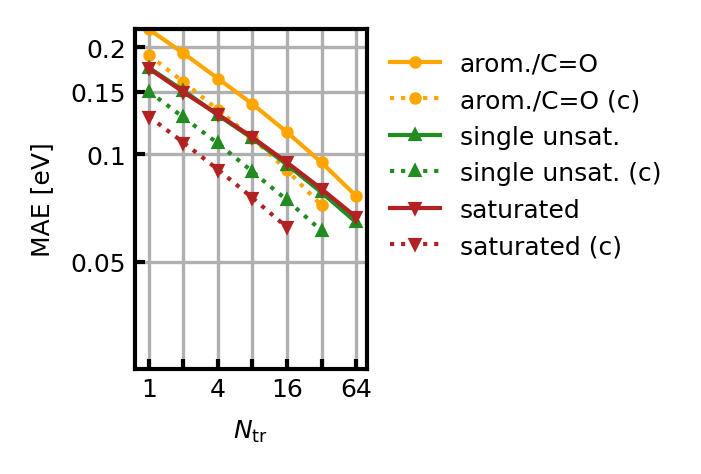

In [41]:
single_plot_lc(res_qm9['H'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm9['H'], xticklabels_qm9['H'], 
               yticks_qm9['H'], yticklabels_qm9['H'], False, ref_qm9['H'])

In [42]:
get_min_max_mae(res_qm9['L'], [0, 1, 2])

(0.06210633496591861, 0.3234411431784311)

In [43]:
xticks_qm9['L'] = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
xticklabels_qm9['L'] = ['1', '', '4', '', '16', '', '64']
yticks_qm9['L'] = [0.05, 0.1, 0.2, 0.3]
yticklabels_qm9['L'] = yticks_qm9['L']

In [45]:
ref_qm9['L'] = {'Faber 2017': {'n_train': [100, 100000], 'mae': [0.0620, 0.0620], 'ls': '--', 'marker': ''},  
                'Schuett 2018': {'n_train': [100, 100000], 'mae': [0.034, 0.034], 'ls': '-.', 'marker': ''}, 
                'Collins 2018': {'n_train': 16000, 'mae': 0.15, 'ls': '', 'marker': 'h'},
                'Anderson 2019': {'n_train': 50000, 'mae': 0.038, 'ls': '', 'marker': 'p'}}

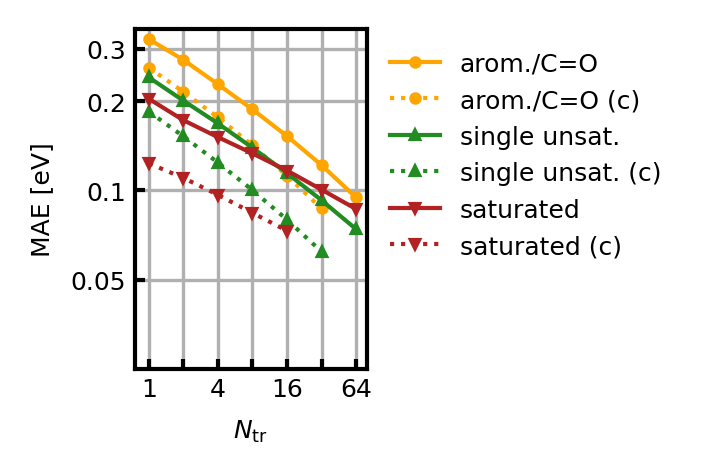

In [46]:
single_plot_lc(res_qm9['L'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm9['L'], xticklabels_qm9['L'], 
               yticks_qm9['L'], yticklabels_qm9['L'], False, ref_qm9['L'])

In [48]:
properties_qm7b = ['G_ZINDO', 'H_ZINDO', 'L_ZINDO', 
                   'G_PBE0', 'H_PBE0', 'L_PBE0',
                   'G_GW', 'H_GW', 'L_GW']
sigmas_qm7b = {-1: 128.0, 0: 512.0, 1: 256.0, 2: 256.0}
res_qm7b = {}
for p in properties_qm7b:
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm7b[sub]
        text = f'qm7b loop {p} {sub} slatm laplacian {sig} -12'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_lc_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_qm7b[p] = res_p

In [49]:
res_qm7b['L_GW'][-1][0]['mae_av']

array([0.4262599 , 0.36095308, 0.31522405, 0.25447453, 0.20916217,
       0.18003688, 0.13721211])

In [50]:
xticks_qm7b = {}
xticklabels_qm7b = {}
yticks_qm7b = {}
yticklabels_qm7b = {}

In [51]:
get_min_max_mae(res_qm7b['G_GW'], [0, 1, 2])

(0.09128607192328557, 0.7415198813909042)

In [52]:
xticks_qm7b['G_GW'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['G_GW'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['G_GW'] = [0.1, 0.2, 0.4, 0.6, 0.8]
yticklabels_qm7b['G_GW'] = yticks_qm7b['G_GW']

In [53]:
ref_qm7b = {}
ref_qm7b['G_GW'] = {}

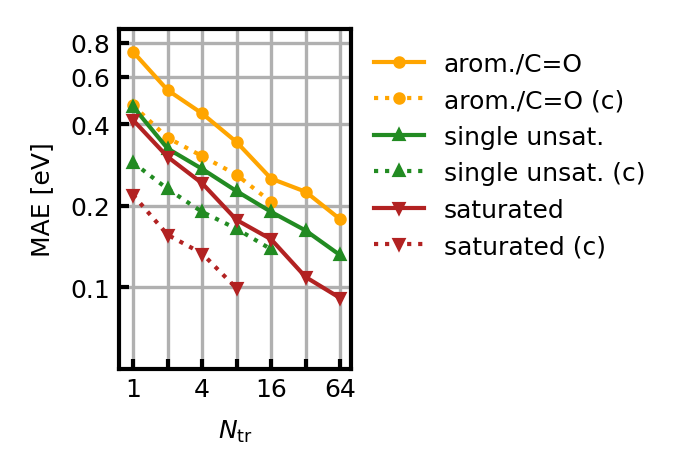

In [54]:
single_plot_lc(res_qm7b['G_GW'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm7b['G_GW'], xticklabels_qm7b['G_GW'], 
               yticks_qm7b['G_GW'], yticklabels_qm7b['G_GW'])

In [55]:
get_min_max_mae(res_qm7b['H_GW'], [0, 1, 2])

(0.08905917245564207, 0.6515862904983645)

In [56]:
xticks_qm7b['H_GW'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['H_GW'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['H_GW'] = [0.1, 0.2, 0.4, 0.6]
yticklabels_qm7b['H_GW'] = yticks_qm7b['H_GW']

In [57]:
ref_qm7b['H_GW'] = {'Collins 2018': {'n_train': 5732, 'mae': 0.13, 'ls': '', 'marker': 'h'},
                    'Montavon 2013': {'n_train': 5000, 'mae': 0.16, 'ls': '', 'marker': '*'}}

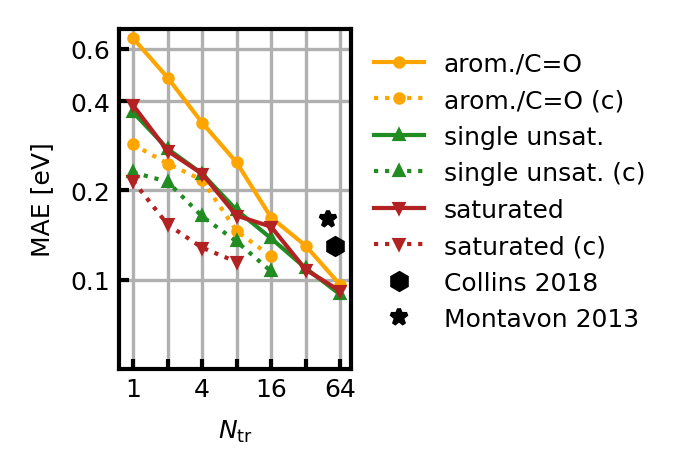

In [58]:
single_plot_lc(res_qm7b['H_GW'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm7b['H_GW'], xticklabels_qm7b['H_GW'], 
               yticks_qm7b['H_GW'], yticklabels_qm7b['H_GW'], True, ref_qm7b['H_GW'])

In [59]:
get_min_max_mae(res_qm7b['L_GW'], [0, 1, 2])

(0.030017299076678206, 0.4262599001294576)

In [60]:
xticks_qm7b['L_GW'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['L_GW'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['L_GW'] = [0.05, 0.1, 0.2, 0.3, 0.4]
yticklabels_qm7b['L_GW'] = yticks_qm7b['L_GW']

In [61]:
ref_qm7b['L_GW'] = {'Collins 2018': {'n_train': 5732, 'mae': 0.13, 'ls': '', 'marker': 'h'},
                    'Montavon 2013': {'n_train': 5000, 'mae': 0.13, 'ls': '', 'marker': '*'}}

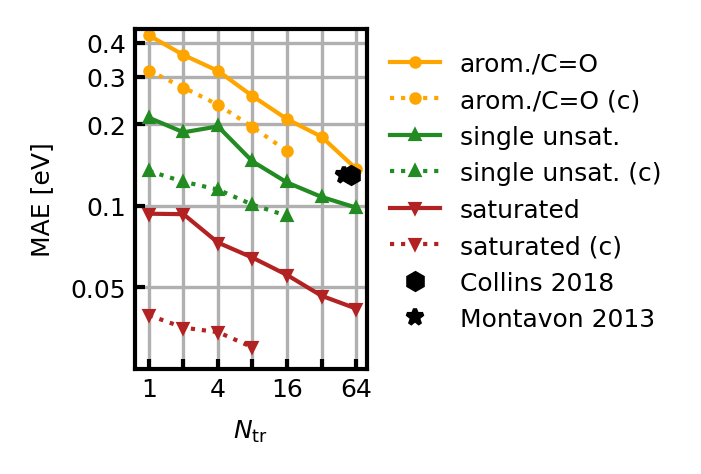

In [62]:
single_plot_lc(res_qm7b['L_GW'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm7b['L_GW'], xticklabels_qm7b['L_GW'], 
               yticks_qm7b['L_GW'], yticklabels_qm7b['L_GW'], True, ref_qm7b['L_GW'])

In [63]:
property_pairs = [('G_ZINDO', 'G_GW'), ('H_ZINDO', 'H_GW'), ('L_ZINDO', 'L_GW'),
              ('G_ZINDO', 'G_PBE0'), ('H_ZINDO', 'H_PBE0'), ('L_ZINDO', 'L_PBE0'),
              ('G_PBE0', 'G_GW'),  ('H_PBE0', 'H_GW'),  ('L_PBE0', 'L_GW')]

res_delta = {}
for p in property_pairs:
    p_base = p[0]
    p_target = p[1]
    res_p = {}
    for sub in subsets:
        sig = sigmas_qm7b[sub]
        text = f'qm7b loop delta {p_base} {p_target} {sub} slatm laplacian {sig} -12'
        hash_str = md5(bytes(text, 'utf-8')).hexdigest()
        with open(f'../results/res_sum_lc_{hash_str}.pkl', 'rb') as inf:
            res_p[sub] = pickle.load(inf)
    res_delta[f'({p_base},{p_target})'] = res_p

In [64]:
res_delta['(L_ZINDO,L_GW)'][-1][0]['mae_av']

array([0.33093475, 0.31937531, 0.27540574, 0.22712055, 0.18343201,
       0.1509652 , 0.11642555])

In [65]:
xticks_delta = {}
xticklabels_delta = {}
yticks_delta = {}
yticklabels_delta = {}

In [66]:
get_min_max_mae(res_delta['(G_ZINDO,G_GW)'], [0, 1, 2])

(0.09347097572246628, 0.7118563788484911)

In [67]:
xticks_delta['(G_ZINDO,G_GW)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(G_ZINDO,G_GW)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(G_ZINDO,G_GW)'] = [0.1, 0.2, 0.4, 0.6, 0.8]
yticklabels_delta['(G_ZINDO,G_GW)'] = yticks_delta['(G_ZINDO,G_GW)']

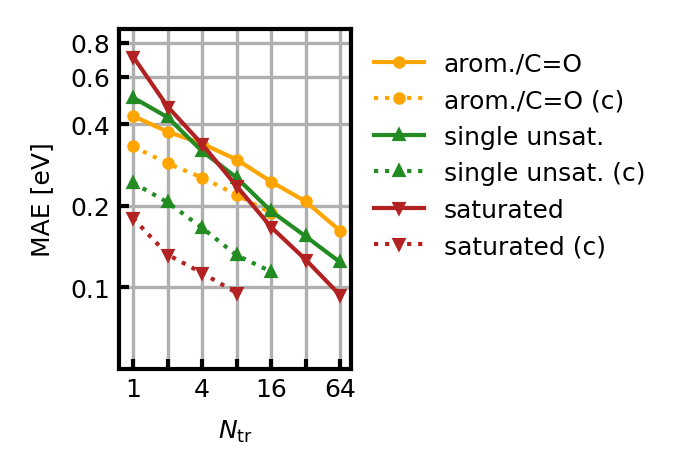

In [68]:
single_plot_lc(res_delta['(G_ZINDO,G_GW)'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_delta['(G_ZINDO,G_GW)'], xticklabels_delta['(G_ZINDO,G_GW)'], 
               yticks_delta['(G_ZINDO,G_GW)'], yticklabels_delta['(G_ZINDO,G_GW)'])

In [69]:
get_min_max_mae(res_delta['(H_ZINDO,H_GW)'], [0, 1, 2])

(0.06459373735337673, 0.25892331236509275)

In [70]:
xticks_delta['(H_ZINDO,H_GW)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(H_ZINDO,H_GW)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(H_ZINDO,H_GW)'] = [0.07, 0.1, 0.15, 0.2, 0.25]
yticklabels_delta['(H_ZINDO,H_GW)'] = yticks_delta['(H_ZINDO,H_GW)']

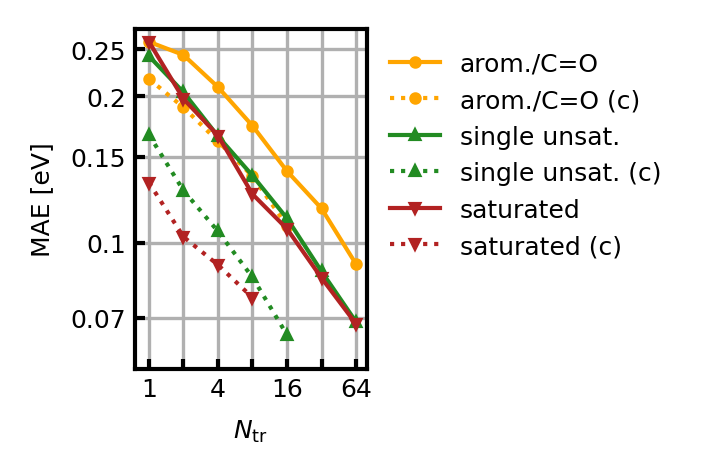

In [71]:
single_plot_lc(res_delta['(H_ZINDO,H_GW)'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_delta['(H_ZINDO,H_GW)'], xticklabels_delta['(H_ZINDO,H_GW)'], 
               yticks_delta['(H_ZINDO,H_GW)'], yticklabels_delta['(H_ZINDO,H_GW)'])

In [72]:
get_min_max_mae(res_delta['(L_ZINDO,L_GW)'], [0, 1, 2])

(0.04773496138465676, 0.4754918142324335)

In [73]:
xticks_delta['(L_ZINDO,L_GW)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(L_ZINDO,L_GW)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(L_ZINDO,L_GW)'] = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
yticklabels_delta['(L_ZINDO,L_GW)'] = yticks_delta['(L_ZINDO,L_GW)']

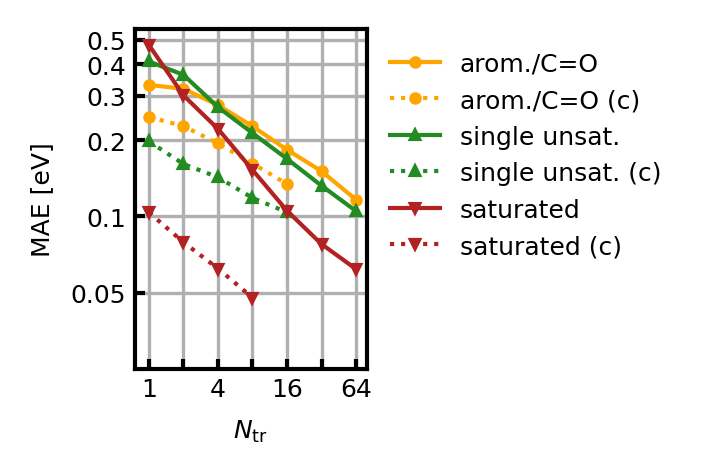

In [74]:
single_plot_lc(res_delta['(L_ZINDO,L_GW)'], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_delta['(L_ZINDO,L_GW)'], xticklabels_delta['(L_ZINDO,L_GW)'], 
               yticks_delta['(L_ZINDO,L_GW)'], yticklabels_delta['(L_ZINDO,L_GW)'])

In [82]:
from matplotlib import gridspec

In [99]:
def subplots_axes_row_lc(axs, res_properties, labels, labels_subsets, colors, markers, subsets, 
                         xticks_subplots, yticks, add_ref, ref_list):
    
    for i, (ax, res_p) in enumerate(zip(axs, res_properties)):
        
        train_sizes = res_p[-1]['train_sizes']
    
        mae = {}
        train_sizes_subsets = {}
        mae_subsets = {}
        for sub in subsets:
            mae[sub] = res_p[-1][sub]['mae_av']
            mae_subsets[sub] = res_p[sub]['mae_av']
            train_sizes_subsets[sub] = res_p[sub]['train_sizes']
            
        xticks = xticks_subplots[i]
        
        if add_ref:
            ax = subplot_axes_lc(ax, train_sizes, mae, train_sizes_subsets, mae_subsets, labels, labels_subsets, 
                                 colors, markers, subsets, xticks, yticks, add_ref, ref_list[i])
        else: 
            ax = subplot_axes_lc(ax, train_sizes, mae, train_sizes_subsets, mae_subsets, labels, labels_subsets, 
                                 colors, markers, subsets, xticks, yticks, False, None)
        
    return axs


def subplots_per_property_lc(res_properties, labels, labels_subsets, colors, markers, subsets, xticks_subplots, xticklabels_subplots, yticks, yticklabels, 
                             titles_subplots, add_ref=False, ref_list=None, save=False, filename='figure.png'):
    
    fs = 6.
    
    fig = plt.figure(figsize=(3, 1.5), dpi=300)
    gs = gridspec.GridSpec(1, 3, figure=fig, hspace=0.1)
    
    axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2])]
    
    axs = subplots_axes_row_lc(axs, res_properties, labels, labels_subsets, colors, markers, subsets, 
                               xticks_subplots, yticks, add_ref, ref_list)
    
    axs[2].legend(fontsize=fs, ncol=2, frameon=False, 
                  bbox_to_anchor=(1, 2.), bbox_transform=axs[2].transAxes)
    
    axs[0].set_xlabel(r'            $N_{\mathrm{tr}}/100$', fontsize=fs)
    axs[2].set_xlabel(r'$N_{\mathrm{tr}}/1000$', fontsize=fs)
    axs[0].set_ylabel(r'MAE [eV]', fontsize=fs)
    
    for i, (ax, title) in enumerate(zip(axs, titles_subplots)):
        ax.set_title(title, fontsize=fs)
    
    for i, ax in enumerate(axs):
        ax.set_xticklabels(xticklabels_subplots[i])
    axs[0].set_yticklabels(yticklabels)
    axs[1].set_yticklabels([])
    axs[2].set_yticklabels([])
    
    for ax in axs:
        ax.tick_params(axis='both', width=1., direction='in', size=2., labelsize=fs)
        
    if save:
        plt.savefig(filename, bbox_inches='tight')
        
    return 

In [76]:
res_G = [res_qm7b['G_GW'], res_delta['(G_ZINDO,G_GW)'], res_qm9['G']]
xticks_G_subplots = [xticks_qm7b['G_GW'], xticks_delta['(G_ZINDO,G_GW)'], xticks_qm9['G']]
xticklabels_G_subplots = [xticklabels_qm7b['G_GW'], xticklabels_delta['(G_ZINDO,G_GW)'], xticklabels_qm9['G']]

In [77]:
get_min_max_mae(res_qm9['G'], [0, 1, 2]), get_min_max_mae(res_qm7b['G_GW'], [0, 1, 2]), get_min_max_mae(res_delta['(G_ZINDO,G_GW)'], [0, 1, 2])

((0.08581166060742748, 0.35802017062180025),
 (0.09128607192328557, 0.7415198813909042),
 (0.09347097572246628, 0.7118563788484911))

In [78]:
yticks_G = [0.1, 0.2, 0.4, 0.6, 0.8]
yticklabels_G = yticks_G

In [79]:
titles_G_subplots = ['QM7b (GW)', r'QM7b ($\Delta_{\mathrm{ZINDO}}^{\mathrm{GW}}$)', 'QM9 (B3LYP)']

In [80]:
ref_list_G = [ref_qm7b['G_GW'], {}, ref_qm9['G']]

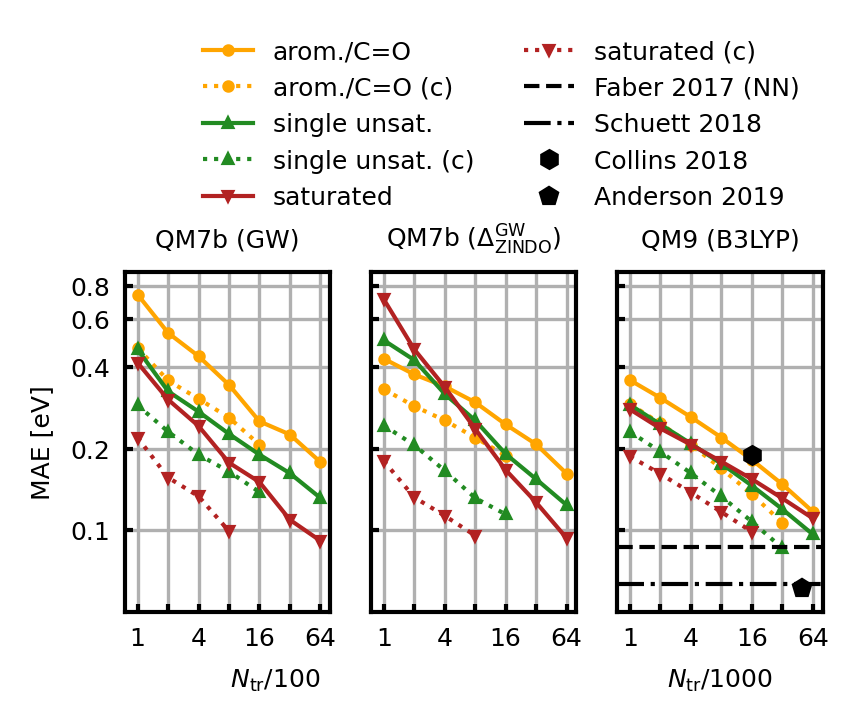

In [97]:
subplots_per_property_lc(res_G, labels, labels_subsets, colors, markers, [0, 1, 2], xticks_G_subplots, xticklabels_G_subplots, yticks_G, yticklabels_G, 
                         titles_G_subplots, True, ref_list_G, True, '../figures/learning_curves_gap.svg')

In [91]:
res_H = [res_qm7b['H_GW'], res_delta['(H_ZINDO,H_GW)'], res_qm9['H']]
xticks_H_subplots = [xticks_qm7b['H_GW'], xticks_delta['(H_ZINDO,H_GW)'], xticks_qm9['H']]
xticklabels_H_subplots = [xticklabels_qm7b['H_GW'], xticklabels_delta['(H_ZINDO,H_GW)'], xticklabels_qm9['H']]

In [92]:
get_min_max_mae(res_qm9['H'], [0, 1, 2]), get_min_max_mae(res_qm7b['H_GW'], [0, 1, 2]), get_min_max_mae(res_delta['(H_ZINDO,H_GW)'], [0, 1, 2])

((0.0610458621012824, 0.22464586002044157),
 (0.08905917245564207, 0.6515862904983645),
 (0.06459373735337673, 0.25892331236509275))

In [93]:
yticks_H = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_H = yticks_H

In [94]:
titles_H_subplots = ['QM7b (GW)', r'QM7b ($\Delta_{\mathrm{ZINDO}}^{\mathrm{GW}}$)', 'QM9 (B3LYP)']

In [95]:
ref_list_H = [ref_qm7b['H_GW'], {}, ref_qm9['H']]

In [96]:
ref_list_H

[{'Collins 2018': {'n_train': 5732, 'mae': 0.13, 'ls': '', 'marker': 'h'},
  'Montavon 2013': {'n_train': 5000, 'mae': 0.16, 'ls': '', 'marker': '*'}},
 {},
 {'Faber 2017': {'n_train': [100, 100000],
   'mae': [0.0549, 0.0549],
   'ls': '--',
   'marker': ''},
  'Schuett 2018': {'n_train': [100, 100000],
   'mae': [0.041, 0.041],
   'ls': '-.',
   'marker': ''},
  'Collins 2018': {'n_train': 16000, 'mae': 0.12, 'ls': '', 'marker': 'h'},
  'Anderson 2019': {'n_train': 50000, 'mae': 0.034, 'ls': '', 'marker': 'p'},
  'Stuke 2018': {'n_train': 32000, 'mae': 0.086, 'ls': '', 'marker': '+'}}]

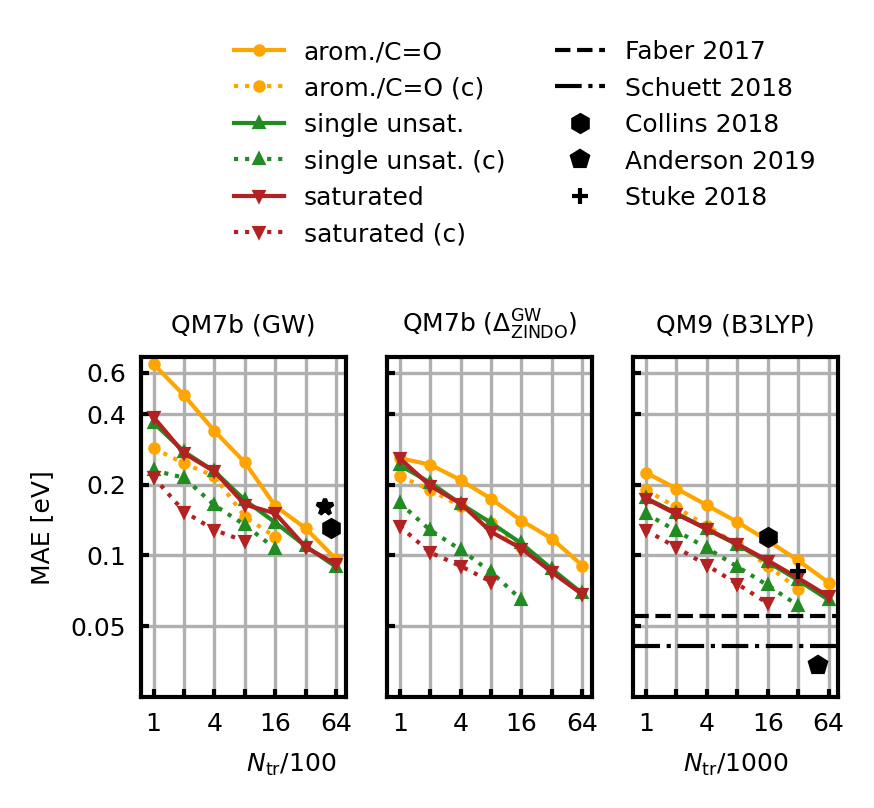

In [100]:
subplots_per_property_lc(res_H, labels, labels_subsets, colors, markers, [0, 1, 2], xticks_H_subplots, xticklabels_H_subplots, yticks_H, yticklabels_H, 
                         titles_H_subplots, True, ref_list_H, True, '../figures/learning_curves_homo.svg')

In [101]:
res_L = [res_qm7b['L_GW'], res_delta['(L_ZINDO,L_GW)'], res_qm9['L']]
xticks_L_subplots = [xticks_qm7b['L_GW'], xticks_delta['(L_ZINDO,L_GW)'], xticks_qm9['L']]
xticklabels_L_subplots = [xticklabels_qm7b['L_GW'], xticklabels_delta['(L_ZINDO,L_GW)'], xticklabels_qm9['L']]

In [102]:
get_min_max_mae(res_qm9['L'], [0, 1, 2]), get_min_max_mae(res_qm7b['L_GW'], [0, 1, 2]), get_min_max_mae(res_delta['(L_ZINDO,L_GW)'], [0, 1, 2])

((0.06210633496591861, 0.3234411431784311),
 (0.030017299076678206, 0.4262599001294576),
 (0.04773496138465676, 0.4754918142324335))

In [103]:
yticks_L = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
yticklabels_L = yticks_L

In [104]:
titles_L_subplots = ['QM7b (GW)', r'QM7b ($\Delta_{\mathrm{ZINDO}}^{\mathrm{GW}}$)', 'QM9 (B3LYP)']

In [105]:
ref_list_L = [ref_qm7b['L_GW'], {}, ref_qm9['L']]

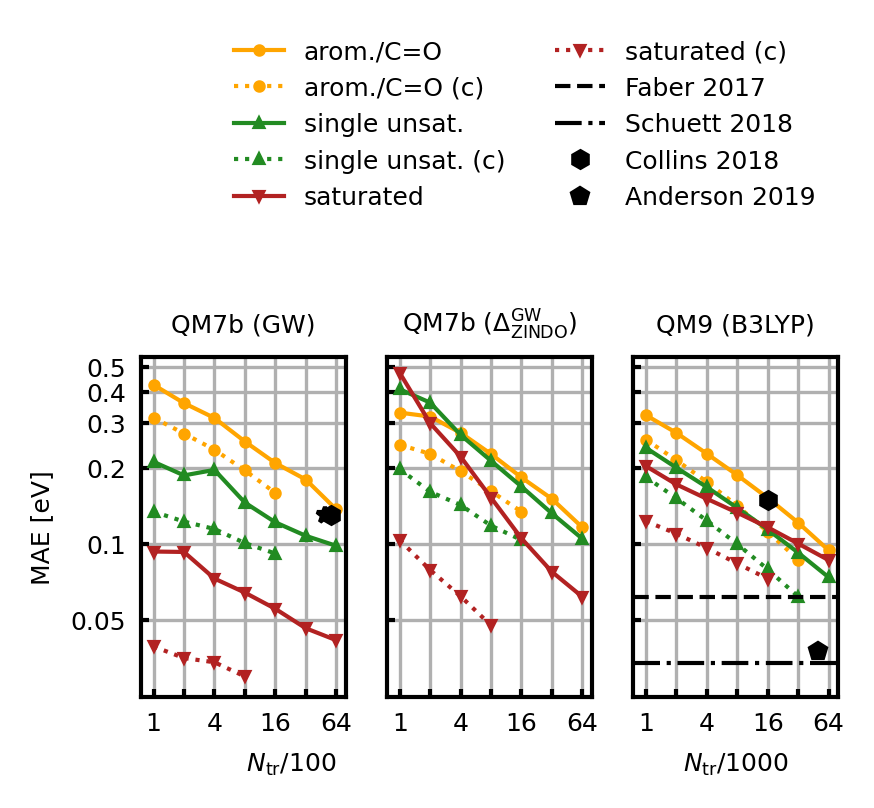

In [107]:
subplots_per_property_lc(res_L, labels, labels_subsets, colors, markers, [0, 1, 2], xticks_L_subplots, xticklabels_L_subplots, yticks_L, yticklabels_L, 
                         titles_L_subplots, True, ref_list_L, True, '../figures/learning_curves_lumo.svg')

In [108]:
# this function plots 2 rows, one row for each property

def subplots_properties_lc(res_properties, labels, labels_subsets, colors, markers, subsets, xticks_subplots, xticklabels_subplots, yticks_rows, yticklabels_rows, 
                           ylabels_rows, titles_subplots, add_ref=True, ref_list=None, save=False, filename='figure.png'):
    
    fs = 6.
    
    fig = plt.figure(figsize=(3, 3), dpi=300)
    gs = gridspec.GridSpec(2, 3, figure=fig, wspace=0.1, hspace=0.1)
    
    axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2]), 
           fig.add_subplot(gs[3]), fig.add_subplot(gs[4]), fig.add_subplot(gs[5])]
    
    for i, res_prop in enumerate(res_properties):
        axs[i*3:(i+1)*3] = subplots_axes_row_lc(axs[i*3:(i+1)*3], res_prop, labels, labels_subsets, colors, markers, subsets, 
                                       xticks_subplots, yticks_rows[i], add_ref, ref_list[i])
    
    axs[2].legend(fontsize=fs, ncol=2, frameon=False, 
                  bbox_to_anchor=(1, 2), bbox_transform=axs[2].transAxes)
    
    axs[3].set_xlabel(r'            $N_{\mathrm{tr}}/100$', fontsize=fs)
    axs[5].set_xlabel(r'$N_{\mathrm{tr}}/1000$', fontsize=fs)
    for ax, ylabel, yticklabels in zip([axs[0], axs[3]], ylabels_rows, yticklabels_rows):
        ax.set_ylabel(ylabel, fontsize=fs)
        ax.set_yticklabels(yticklabels)
        
    for ax in [axs[1], axs[2], axs[4], axs[5]]:
        ax.set_yticklabels([])
    
    for i, (ax, title) in enumerate(zip(axs[:3], titles_subplots)):
        ax.set_title(title, fontsize=fs)
        
    for ax in axs[:3]:
        ax.set_xticklabels([])
    
    for i, ax in enumerate([axs[3], axs[4], axs[5]]):
        ax.set_xticklabels(xticklabels_subplots[i])
    
    for ax in axs:
        ax.tick_params(axis='both', width=1., direction='in', size=2.5, labelsize=fs)
        
    if save:
        plt.savefig(filename, bbox_inches='tight')
        
    return 

In [109]:
ylabel_homo = r'$\epsilon_{\mathrm{HOMO}}$'
ylabel_lumo = r'$\epsilon_{\mathrm{LUMO}}$'

In [110]:
ylabels_rows = [ylabel_homo, ylabel_lumo]

In [111]:
xticklabels_L_subplots

[['1', '', '4', '', '16', '', '64'],
 ['1', '', '4', '', '16', '', '64'],
 ['1', '', '4', '', '16', '', '64']]

In [112]:
yticks_L

[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

In [113]:
ref_list_homo_lumo = [ref_list_H, ref_list_L]

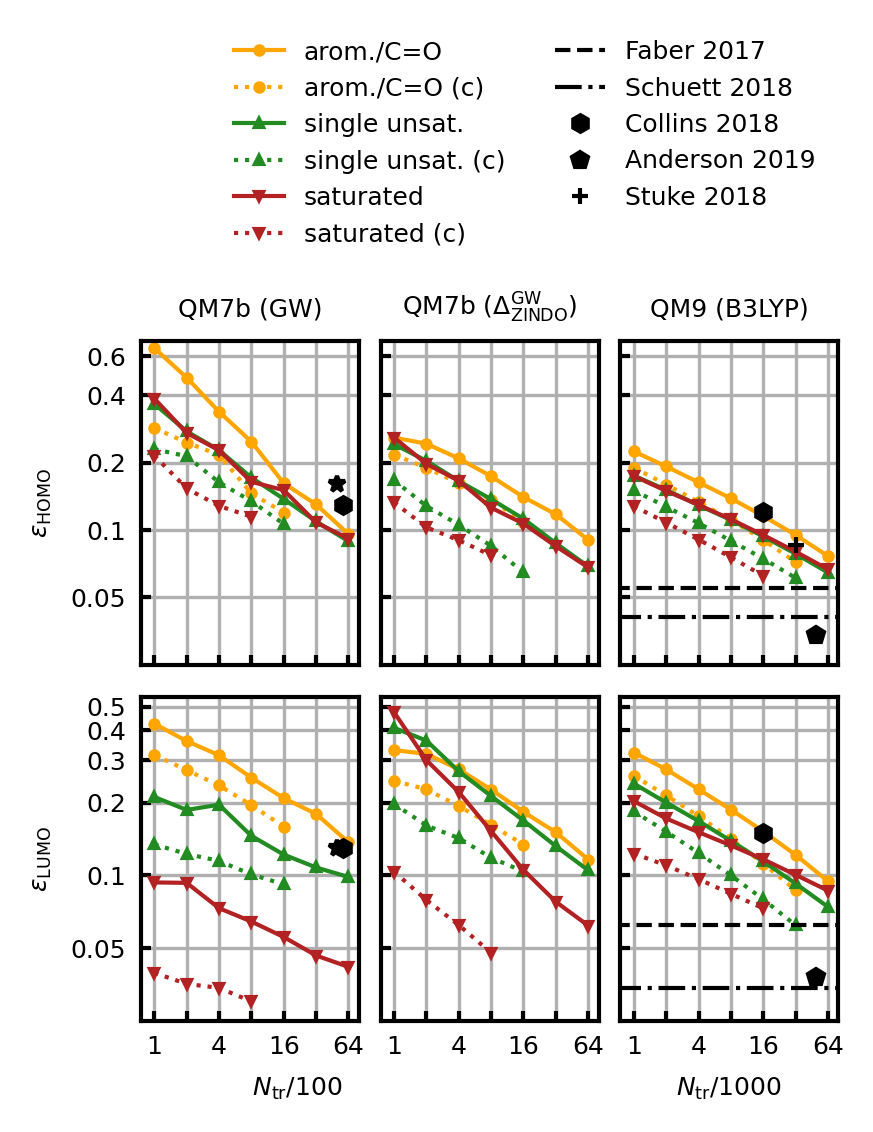

In [115]:
subplots_properties_lc([res_H, res_L], labels, labels_subsets, colors, markers, [0, 1, 2], xticks_L_subplots, xticklabels_L_subplots, 
                       [yticks_H, yticks_L], [yticklabels_H, yticklabels_L], ylabels_rows, titles_H_subplots, True, ref_list_homo_lumo, 
                       True, '../figures/learning_curves_homo_lumo.svg')

In [116]:
get_min_max_mae(res_qm7b['G_ZINDO'], [0, 1, 2])

(0.06297220457974698, 0.8165485327594976)

In [117]:
get_min_max_mae(res_qm7b['H_ZINDO'], [0, 1, 2])

(0.06585480394521431, 0.549551265602142)

In [118]:
get_min_max_mae(res_qm7b['L_ZINDO'], [0, 1, 2])

(0.028395121501386324, 0.4353994975613856)

In [119]:
xticks_qm7b['G_ZINDO'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['G_ZINDO'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['G_ZINDO'] = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]
yticklabels_qm7b['G_ZINDO'] = yticks_qm7b['G_ZINDO']

In [120]:
xticks_qm7b['H_ZINDO'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['H_ZINDO'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['H_ZINDO'] = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]
yticklabels_qm7b['H_ZINDO'] = yticks_qm7b['H_ZINDO']

In [121]:
xticks_qm7b['L_ZINDO'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['L_ZINDO'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['L_ZINDO'] = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]
yticklabels_qm7b['L_ZINDO'] = yticks_qm7b['L_ZINDO']

In [122]:
res_qm7b_zindo = [res_qm7b['G_ZINDO'], res_qm7b['H_ZINDO'], res_qm7b['L_ZINDO']]
xticks_qm7b_zindo = [xticks_qm7b['G_ZINDO'], xticks_qm7b['H_ZINDO'], xticks_qm7b['L_ZINDO']]
xticklabels_qm7b_zindo = [xticklabels_qm7b['G_ZINDO'], xticklabels_qm7b['H_ZINDO'], xticklabels_qm7b['L_ZINDO']]

In [123]:
yticks_qm7b_zindo = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8]
yticklabels_qm7b_zindo = yticks_qm7b_zindo

In [125]:
title_gap = r'$\Delta \epsilon$'
title_homo = r'$\epsilon^{\mathrm{HOMO}}$'
title_lumo = r'$\epsilon^{\mathrm{LUMO}}$'
titles = [title_gap, title_homo, title_lumo]

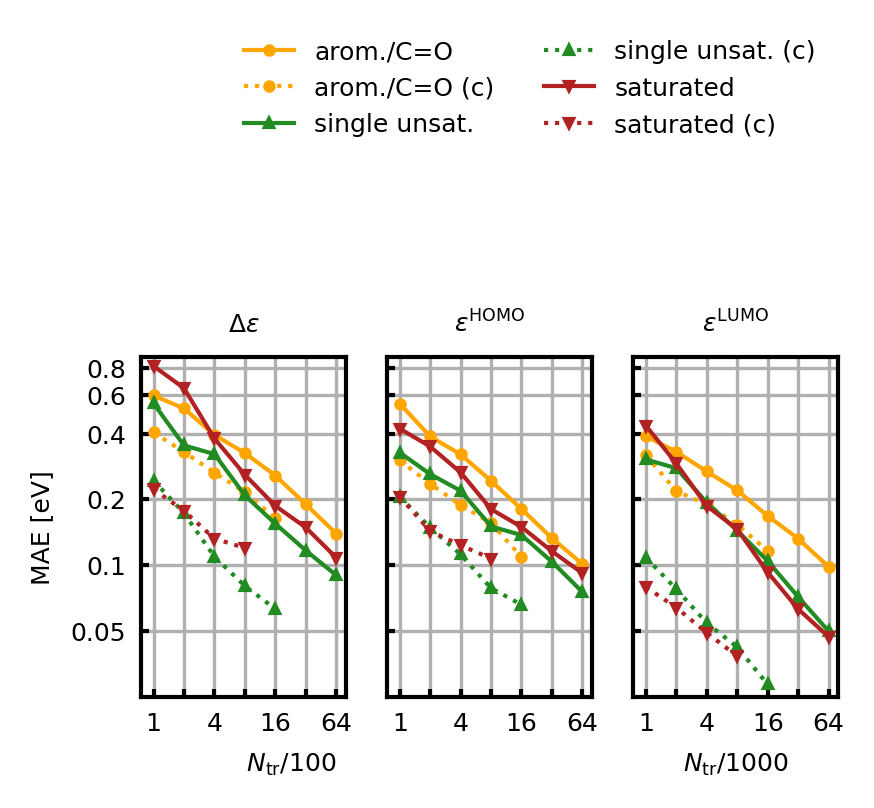

In [126]:
subplots_per_property_lc(res_qm7b_zindo, labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm7b_zindo, xticklabels_qm7b_zindo, yticks_qm7b_zindo, yticklabels_qm7b_zindo, 
                         titles, save=True, filename='../figures/learning_curves_qm7b_zindo.svg')

In [127]:
get_min_max_mae(res_qm7b['G_PBE0'], [0, 1, 2])

(0.08764360184768431, 0.6827550357286347)

In [128]:
get_min_max_mae(res_qm7b['H_PBE0'], [0, 1, 2])

(0.07237745544582179, 0.47987596985893965)

In [129]:
get_min_max_mae(res_qm7b['L_PBE0'], [0, 1, 2])

(0.034112091524851174, 0.4374577545396943)

In [130]:
xticks_qm7b['G_PBE0'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['G_PBE0'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['G_PBE0'] = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_qm7b['G_PBE0'] = yticks_qm7b['G_PBE0']

In [131]:
xticks_qm7b['H_PBE0'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['H_PBE0'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['H_PBE0'] = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_qm7b['H_PBE0'] = yticks_qm7b['H_PBE0']

In [132]:
xticks_qm7b['L_PBE0'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_qm7b['L_PBE0'] = ['1', '', '4', '', '16', '', '64']
yticks_qm7b['L_PBE0'] = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_qm7b['L_PBE0'] = yticks_qm7b['L_PBE0']

In [133]:
res_qm7b_pbe0 = [res_qm7b['G_PBE0'], res_qm7b['H_PBE0'], res_qm7b['L_PBE0']]
xticks_qm7b_pbe0 = [xticks_qm7b['G_PBE0'], xticks_qm7b['H_PBE0'], xticks_qm7b['L_PBE0']]
xticklabels_qm7b_pbe0 = [xticklabels_qm7b['G_PBE0'], xticklabels_qm7b['H_PBE0'], xticklabels_qm7b['L_PBE0']]

yticks_qm7b_pbe0 = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_qm7b_pbe0 = yticks_qm7b_pbe0

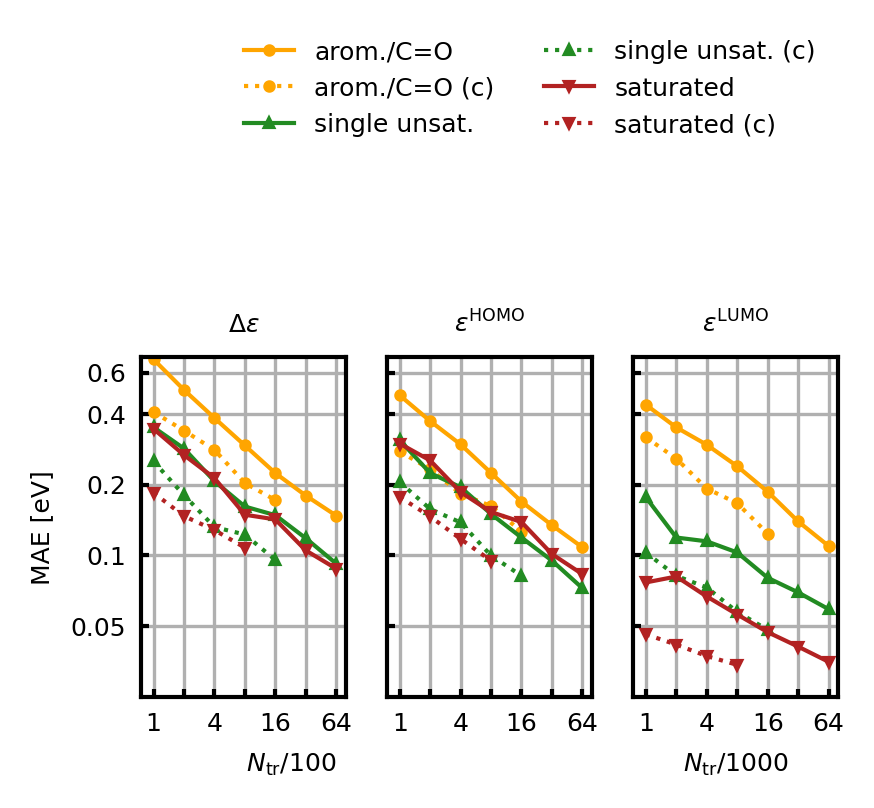

In [134]:
subplots_per_property_lc(res_qm7b_pbe0, labels, labels_subsets, colors, markers, [0, 1, 2], xticks_qm7b_pbe0, xticklabels_qm7b_pbe0, yticks_qm7b_pbe0, yticklabels_qm7b_pbe0, 
                         titles, save=False, filename='../figures/learning_curves_qm7b_pbe0.svg')

In [135]:
get_min_max_mae(res_delta['(G_PBE0,G_GW)'], [0, 1, 2])

(0.033344397479455834, 0.25931413754717425)

In [136]:
get_min_max_mae(res_delta['(H_PBE0,H_GW)'], [0, 1, 2])

(0.022466820833351258, 0.09706860408697852)

In [137]:
get_min_max_mae(res_delta['(L_PBE0,L_GW)'], [0, 1, 2])

(0.02287107303206215, 0.23526853379311263)

In [138]:
xticks_delta['(G_PBE0,G_GW)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(G_PBE0,G_GW)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(G_PBE0,G_GW)'] = [0.03, 0.05, 0.1, 0.2, 0.3]
yticklabels_delta['(G_PBE0,G_GW)'] = yticks_delta['(G_PBE0,G_GW)']

In [139]:
xticks_delta['(H_PBE0,H_GW)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(H_PBE0,H_GW)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(H_PBE0,H_GW)'] = [0.03, 0.05, 0.1, 0.2, 0.3]
yticklabels_delta['(H_PBE0,H_GW)'] = yticks_delta['(H_PBE0,H_GW)']

In [140]:
xticks_delta['(L_PBE0,L_GW)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(L_PBE0,L_GW)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(L_PBE0,L_GW)'] = [0.03, 0.05, 0.1, 0.2, 0.3]
yticklabels_delta['(L_PBE0,L_GW)'] = yticks_delta['(L_PBE0,L_GW)']

In [141]:
res_delta_pbe0_gw = [res_delta['(G_PBE0,G_GW)'], res_delta['(H_PBE0,H_GW)'], res_delta['(L_PBE0,L_GW)']]
xticks_delta_pbe0_gw = [xticks_delta['(G_PBE0,G_GW)'], xticks_delta['(H_PBE0,H_GW)'], xticks_delta['(L_PBE0,L_GW)']]
xticklabels_delta_pbe0_gw = [xticklabels_delta['(G_PBE0,G_GW)'], xticklabels_delta['(H_PBE0,H_GW)'], xticklabels_delta['(L_PBE0,L_GW)']]

yticks_delta_pbe0_gw = [0.03, 0.05, 0.1, 0.2, 0.3]
yticklabels_delta_pbe0_gw = yticks_delta_pbe0_gw

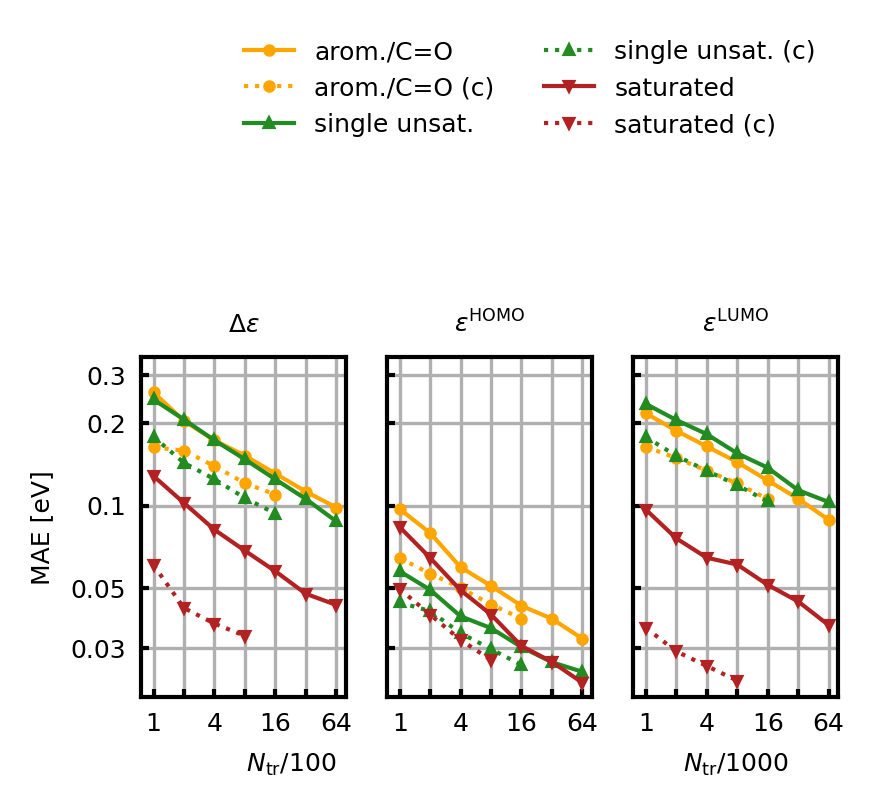

In [143]:
subplots_per_property_lc(res_delta_pbe0_gw, labels, labels_subsets, colors, markers, [0, 1, 2], xticks_delta_pbe0_gw, xticklabels_delta_pbe0_gw, yticks_delta_pbe0_gw, 
                         yticklabels_delta_pbe0_gw, titles, save=True, filename='../figures/learning_curves_delta_pbe0_gw.svg')

In [144]:
get_min_max_mae(res_delta['(G_ZINDO,G_PBE0)'], [0, 1, 2])

(0.08060598483820673, 0.674933297618727)

In [145]:
get_min_max_mae(res_delta['(H_ZINDO,H_PBE0)'], [0, 1, 2])

(0.056418466427382144, 0.2839092162289192)

In [146]:
get_min_max_mae(res_delta['(L_ZINDO,L_PBE0)'], [0, 1, 2])

(0.05040852683972864, 0.4514028764262605)

In [147]:
xticks_delta['(G_ZINDO,G_PBE0)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(G_ZINDO,G_PBE0)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(G_ZINDO,G_PBE0)'] = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_delta['(G_ZINDO,G_PBE0)'] = yticks_delta['(G_ZINDO,G_PBE0)']

In [148]:
xticks_delta['(H_ZINDO,H_PBE0)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(H_ZINDO,H_PBE0)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(H_ZINDO,H_PBE0)'] = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_delta['(H_ZINDO,H_PBE0)'] = yticks_delta['(H_ZINDO,H_PBE0)']

In [149]:
xticks_delta['(L_ZINDO,L_PBE0)'] = [100, 200, 400, 800, 1600, 3200, 6400]
xticklabels_delta['(L_ZINDO,L_PBE0)'] = ['1', '', '4', '', '16', '', '64']
yticks_delta['(L_ZINDO,L_PBE0)'] = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_delta['(L_ZINDO,L_PBE0)'] = yticks_delta['(L_ZINDO,L_PBE0)']

In [150]:
res_delta_zindo_pbe0= [res_delta['(G_ZINDO,G_PBE0)'], res_delta['(H_ZINDO,H_PBE0)'], res_delta['(L_ZINDO,L_PBE0)']]
xticks_delta_zindo_pbe0 = [xticks_delta['(G_ZINDO,G_PBE0)'], xticks_delta['(H_ZINDO,H_PBE0)'], xticks_delta['(L_ZINDO,L_PBE0)']]
xticklabels_delta_zindo_pbe0 = [xticklabels_delta['(G_ZINDO,G_PBE0)'], xticklabels_delta['(H_ZINDO,H_PBE0)'], xticklabels_delta['(L_ZINDO,L_PBE0)']]

yticks_delta_zindo_pbe0 = [0.05, 0.1, 0.2, 0.4, 0.6]
yticklabels_delta_zindo_pbe0 = yticks_delta_zindo_pbe0

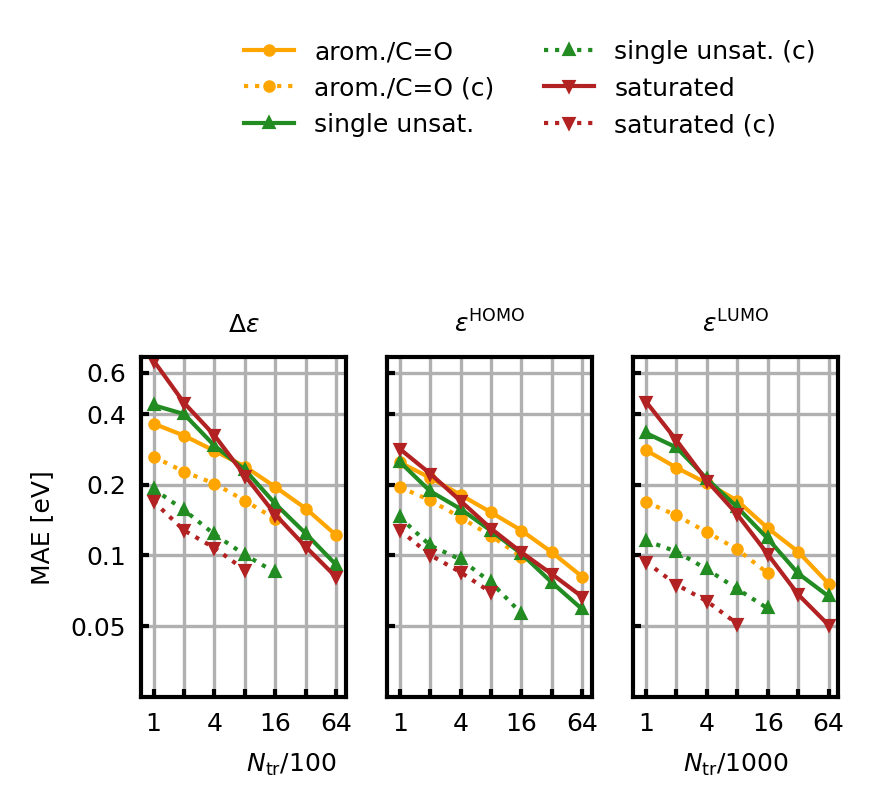

In [151]:
subplots_per_property_lc(res_delta_zindo_pbe0, labels, labels_subsets, colors, markers, [0, 1, 2], xticks_delta_zindo_pbe0, xticklabels_delta_zindo_pbe0, yticks_delta_zindo_pbe0, 
                         yticklabels_delta_zindo_pbe0, titles, save=True, filename='../figures/learning_curves_delta_zindo_pbe0.svg')